

### 1.   # Import data manipulation and analysis libraries
### 2.   # Import libraries for data visualization



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import the dataset

In [ ]:
df=pd.read_csv("/content/Salary_dataset.csv")

### Display the first few rows of the dataset

In [ ]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344
1,1,1.4,46206
2,2,1.6,37732
3,3,2.1,43526
4,4,2.3,39892


### Drop the 'Unnamed: 0' column

In [ ]:
df=df.drop(df[['Unnamed: 0']],axis=1)

### Display the first few rows of the dataset after Drop the 'Unnamed: 0' column

In [ ]:
df.head()

,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892



### Display a summary of the dataset, including data types and missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes



### Display a summary of the dataset, including data types and missing values

In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


### Check for missing values in each column

In [ ]:
df.isnull().sum()

,0
YearsExperience,0
Salary,0


### Check for duplicate rows in the DataFrame

In [ ]:
df.duplicated().sum()

0

### Scatter plot of Years of Experience vs Salary

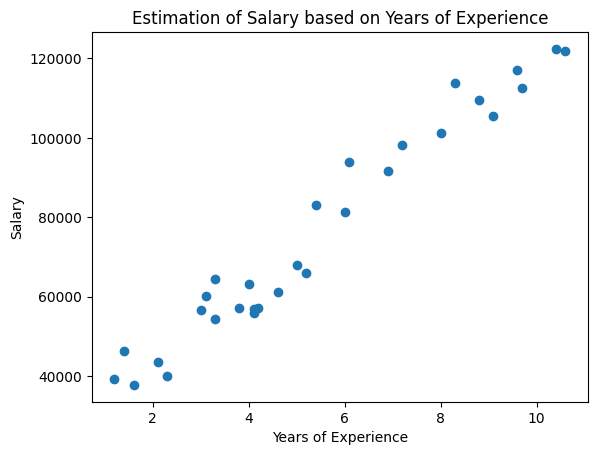

In [ ]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.title("Estimation of Salary based on Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()


### Initialize the Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

### Train the Linear Regression model

In [ ]:
LR.fit(df[['YearsExperience']],df['Salary'])

LinearRegression()

### Get the intercept of the linear regression model

In [ ]:
LR.intercept_

24848.203966523208

### Get the coefficient (slope) for YearsExperience

In [ ]:
LR.coef_

array([9449.96232146])

### Predict the salaries using the trained model

In [ ]:
y_pred=LR.predict(df[['YearsExperience']])
y_pred

array([ 36188.15875227,  38078.15121656,  39968.14368085,  44693.12484158,
        46583.11730587,  53198.09093089,  54143.08716303,  56033.07962732,
        56033.07962732,  60758.06078805,  62648.05325234,  63593.04948449,
        63593.04948449,  64538.04571663,  68318.03064522,  72098.0155738 ,
        73988.00803809,  75878.00050238,  81547.97789525,  82492.9741274 ,
        90052.94398456,  92887.932681  , 100447.90253816, 103282.8912346 ,
       108007.87239533, 110842.86109176, 115567.84225249, 116512.83848464,
       123127.81210966, 125017.80457395])

### Visualization that compares the actual salaries with the predicted salaries from your linear regression model.

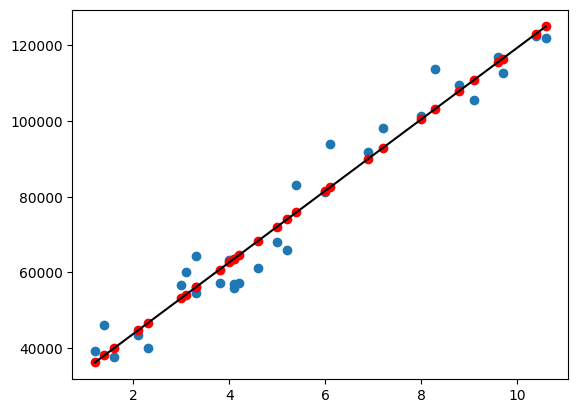

In [ ]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.scatter(df['YearsExperience'],y_pred,color="red")
plt.plot(df['YearsExperience'],y_pred,color="black")
plt.show()

### Calculates the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) of the predictions

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df['Salary'],y_pred)
print("mean square error",np.round(mse,2))
rmse=mean_squared_error(df['Salary'],y_pred,squared=False)
print("root mean square error",np.round(rmse,2))

mean square error 31270951.72
root mean square error 5592.04


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Calculate R-squared score

In [ ]:
from sklearn.metrics import r2_score
r2score=r2_score(df['Salary'],y_pred)
print("r square",np.round(r2score,2))

r square 0.96


In [ ]:


import pickle

filename = 'linear_regression_model.pkl'
pickle.dump(LR, open(filename, 'wb'))